<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg", "https://www.adobe.com/express/feature/image/media_16ad2258cac6171d66942b13b8cd4839f0b6be6f3.png"]  # Random image of a kitten

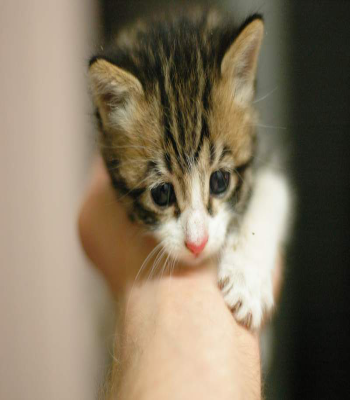

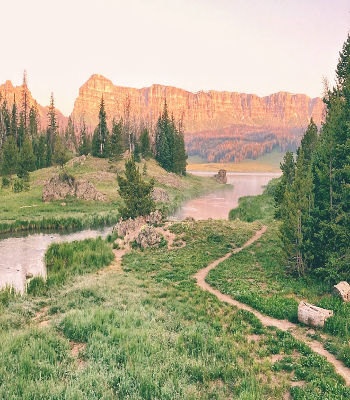

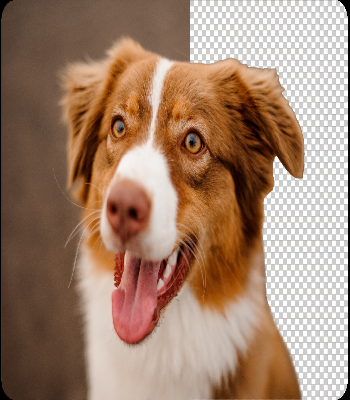

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (350, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

In [ ]:
gray = grayscale(images[0])

In [ ]:
gray_jpg = grayscale(images[1])

In [ ]:
gray_png = grayscale(images[2])

In [ ]:
# coffee.tiff

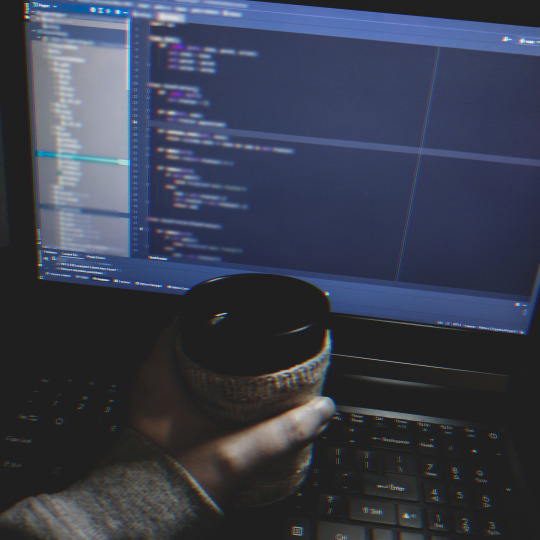

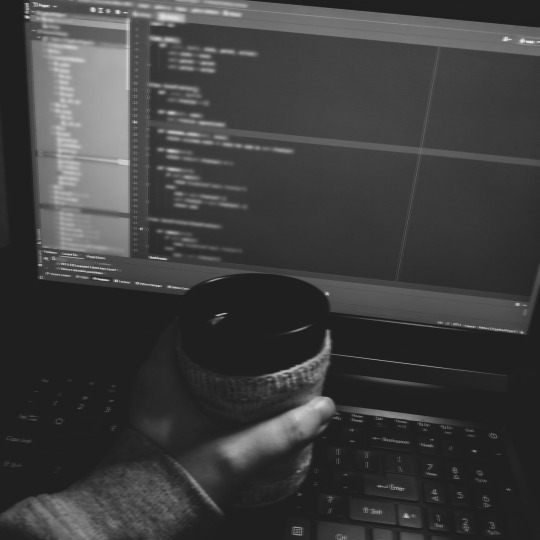

In [ ]:
image_tiff = cv2.imread('coffee.tiff')
cv2_imshow(image_tiff)
gray_tiff = grayscale(image_tiff)
cv2_imshow(gray_tiff)

# 1. Convert the grayscale image into rgb, cmyk
Unfortunately this is not possible. Grayscale images do not contain sufficient information to create a color image. We can, however, generate a false colour and you can also make some assumptions that may be fairly reasonable for some/many pictures.

In [ ]:
def grayscale_to_rgb(gray):
  bgr = []
  for i in gray:
    row = []
    for j in i:
      R = 0
      G = 0
      B = 0
      if(j < 85):
        R = 255
      elif(j < 170):
        G = 255
      else:
        B = 255
      l = [R,G,B]
      row.append(l)
    bgr.append(row)

  bgr = np.array(bgr)
  bgr = bgr.astype('uint8')
  rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
  cv2_imshow(rgb)
  return rgb

## JPEG

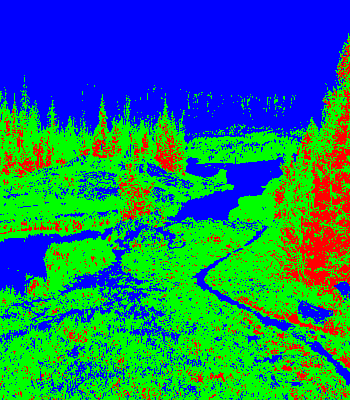

In [ ]:
rgb_jpg = grayscale_to_rgb(gray_jpg)

## PNG

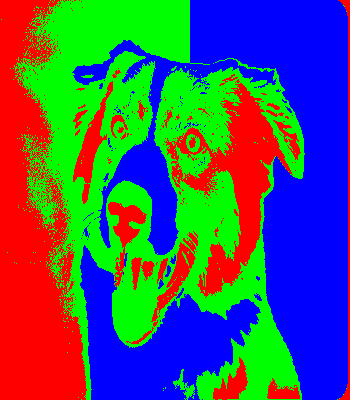

In [ ]:
rgb_tiff = grayscale_to_rgb(gray_png)

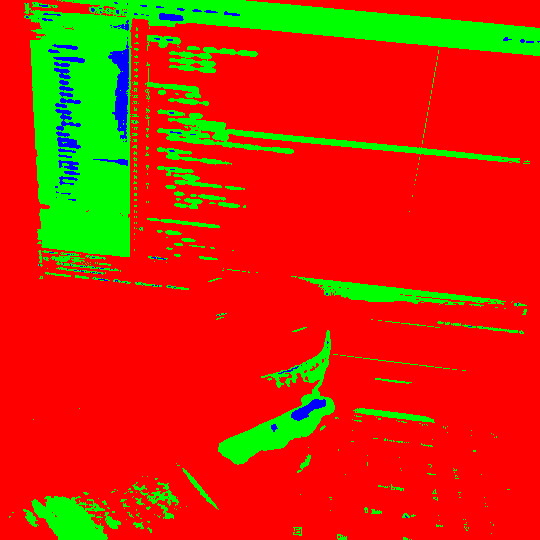

In [ ]:
rgb_tiff = grayscale_to_rgb(gray_tiff)

# 2. Convert the color image into grayscale


In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray

## JPEG

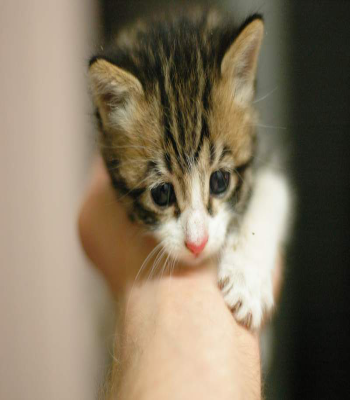

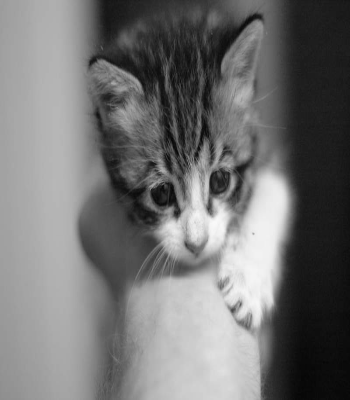

In [ ]:
cv2_imshow(images[0])
image_grayed = grayscale(images[0])
cv2_imshow(image_grayed)

## PNG

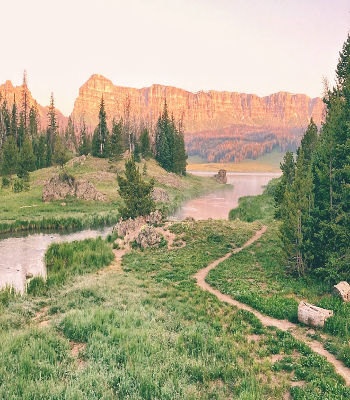

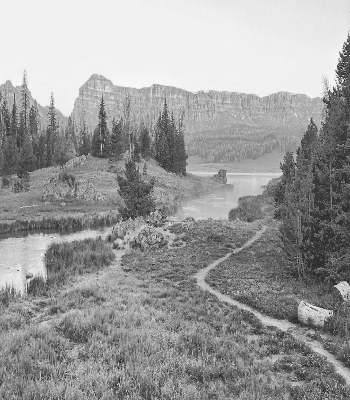

In [ ]:
cv2_imshow(images[1])
image_grayed = grayscale(images[1])
cv2_imshow(image_grayed)

## TIFF

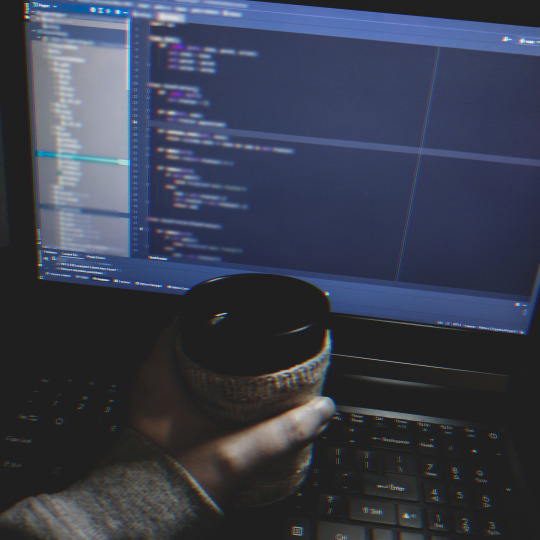

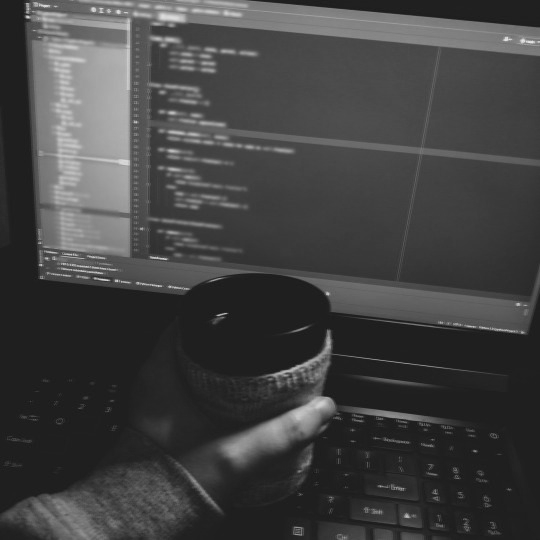

In [ ]:
cv2_imshow(image_tiff)
image_grayed = grayscale(image_tiff)
cv2_imshow(image_grayed)

#3. Consider an image with extensions such as .jpeg, png, tiff, etc


JPEG, PNG, and TIFF images were considered above.

#4. Use block based segmentation on grayscale image to identify the homogenous regions for the images obtained from 1 – 3. Save the output image


In [ ]:
arr_2d = np.array([[3, 3, 3, 3],
                   [3, 3, 3, 3],
                   [3, 3, 3, 3],
                   [3, 3, 3, 3]])
# Get a flattened 1D view of 2D numpy array
flatten_arr = np.ravel(arr_2d)
print(flatten_arr)
# Check if all value in 2D array are equal
result = np.all(arr_2d==flatten_arr[0])
if result:
    print('All Values in 2D Numpy Array are same / equal')
else:
    print('All Values in 2D Numpy Array are not same')

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
All Values in 2D Numpy Array are same / equal


In [ ]:
def draw_lines(image, original_image, changed_image, n, a, b):
  r, c = image.shape
  half = c//2
  half2 = r//2
  for i in range(a, (a+r)):
      changed_image[i][half] = 255
  for i in range(b, (b+c)):
      changed_image[half2][i] = 255
  return changed_image

  """
  if(n == 0):
    for i in range(0, r):
      original_image[i][half] = 255
    for i in range(0, c):
      original_image[half2][i] = 255
  elif(n == 1):
    for i in range(0, half2):
      original_image[i][half//2] = 255
    for i in range(0, half):
      original_image[half2//2][i] = 255
  elif(n == 2):
    for i in range(0, half2):
      original_image[i][3 * (half//2)] = 255
    for i in range(half, c):
      original_image[half2//2][i] = 255
  elif(n == 3):
    for i in range(half2, r):
      original_image[i][half//2] = 255
    for i in range(0, half):
      original_image[3 * (half2//2)][i] = 255
  elif(n == 4):
    for i in range(half2, r):
      original_image[i][3 * (half//2)] = 255
    for i in range(half, c):
      original_image[3 * (half2//2)][i] = 255
    """

In [ ]:
def block_based_segmentation(image, original_image, changed_image, n, a, b):

  r, c = image.shape

  if(r < 2 or c < 2):
    return original_image

  changed_image = draw_lines(image, original_image, changed_image, 0, a, b)

  half = c//2
  half2 = r//2
  left = image[:half2, :half].copy()
  right = image[half2:, half:].copy()
  top = image[:half2, half:].copy()
  bottom = image[half2:, :half].copy()

  print(left, right, top, bottom)

  #cv2_imshow(left)
  #cv2_imshow(right)
  #cv2_imshow(top)
  #cv2_imshow(bottom)

  flatten_left = np.ravel(left)
  flatten_right = np.ravel(right)
  flatten_top = np.ravel(top)
  flatten_bottom = np.ravel(bottom)

  result_left = np.all(flatten_left==left[0][0])
  print(flatten_left==left[0][0])
  result_right = np.all(flatten_right==right[0][0])
  result_top = np.all(flatten_top==top[0][0])
  result_bottom = np.all(flatten_bottom==bottom[0][0])

  if not result_left:
    #print("left")
    changed_image = block_based_segmentation(left, original_image, changed_image,1, a, b)
  if not result_right:
    #print("right")
    changed_image = block_based_segmentation(right, original_image, changed_image,4, half2, half)
  if not result_top:
    #print("top")
    changed_image = block_based_segmentation(top, original_image,changed_image ,2, a, half)
  if not result_bottom:
    #print("bottom")
    changed_image = block_based_segmentation(bottom, original_image,changed_image, 3, half2, b)

  return changed_image



In [ ]:
gray_rgb_jpg = grayscale(images[0])
h, w = gray_rgb_jpg.shape
half = w//16
half2 = h//16
gray_rgb_jpg = gray_rgb_jpg[:half2, :half]
cv2_imshow(gray_rgb_jpg)
gray_rgb_jpg = grayscale_to_rgb(gray_rgb_jpg)
gray_rgb_jpg = cv2.cvtColor(gray_rgb_jpg, cv2.COLOR_RGB2GRAY)
gray_rgb_jpg = block_based_segmentation(gray_rgb_jpg, gray_rgb_jpg, gray_rgb_jpg,0, 0, 0)
cv2_imshow(gray_rgb_jpg)

[[150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]
 [150 150 150 150 150 150 150 150 150 150]] [[255 255 255 255 255 255 255 255 255 255 255]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150 150 150 150 150 150 150 150 150]
 [255 150 150

In [ ]:
r, c = gray_tiff.shape

half = c//2
half2 = r//2
for i in range(0, half2):
      gray_tiff[i][(3 * half)//2] = 255
for i in range(half, c):
      gray_tiff[half2//2][i] = 255
cv2_imshow(gray_tiff)

#5. Record the inferences


#6. Use block based segmentation on color image to identify the homogenous regions. Save the output image (You can use range values of the image intensities of a shade)